In [11]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [12]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int

    sr: float
    bpb: float
    boundary_percent : float
    summary : str
 

In [22]:
def calculate_sr(state:BatsmanState) ->BatsmanState:
    sr = (state['runs'] / state['balls'])/100
    return {'sr' : sr}

In [23]:
def calculate_bpb(state:BatsmanState)->BatsmanState:
    bpb= state['balls'] / (state['fours'] + state['sixes'])
    return {'bpb' : bpb}

In [24]:
def calculate_boundary_percentage(state:BatsmanState) ->BatsmanState:
    boundary_percent = (((state['fours'] * 4 )+ (state['sixes'] * 6)) / state['runs'] ) * 100 
    return {"boundary_percent" : boundary_percent}

In [25]:
def summary(state: BatsmanState) ->BatsmanState:
    summary = f"""
        Strike Rate : {state['sr']} \n
        Balls Per Boundary : {state['bpb']} \n
        Boundary Percentage : {state['boundary_percent']} \n
        """
    return {"summary" : summary} 

In [27]:
graph = StateGraph(BatsmanState)

graph.add_node("calculate_sr" , calculate_sr)
graph.add_node("calculate_bpb" , calculate_bpb)
graph.add_node("calculate_boundary_persentage" , calculate_boundary_percentage)
graph.add_node("summary" , summary)

graph.add_edge(START , "calculate_sr")
graph.add_edge(START , "calculate_bpb")
graph.add_edge(START , "calculate_boundary_persentage")

graph.add_edge("calculate_sr" , "summary")
graph.add_edge("calculate_bpb" , "summary")
graph.add_edge("calculate_boundary_persentage" , "summary")
graph.add_edge("summary" , END)

workflow = graph.compile()

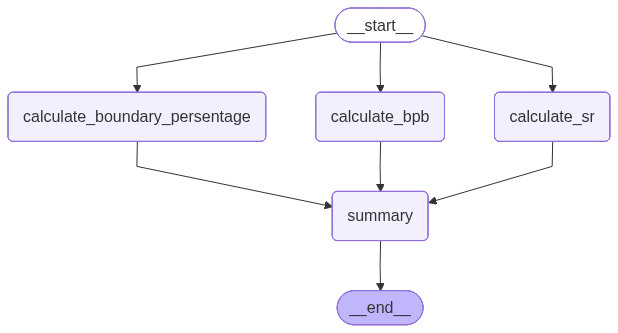

In [28]:
workflow

In [29]:
initial_state = BatsmanState(runs=100 ,balls=50 , fours=6 , sixes=4)

final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 0.02, 'bpb': 5.0, 'boundary_percent': 48.0, 'summary': '\n        Strike Rate : 0.02 \n\n        Balls Per Boundary : 5.0 \n\n        Boundary Percentage : 48.0 \n\n        '}


In [30]:
print(final_state['summary'])


        Strike Rate : 0.02 

        Balls Per Boundary : 5.0 

        Boundary Percentage : 48.0 

        
